# SIMULATION OF NLOS-VLC SYSTEM USING THE ROLLING SHUTTER MECHANISM

Import the transmitter, surface and camera objects, as well as numpy library.

In [1]:
#Import module Transmitter
from transmitter import Transmitter as Transmitter

from surface import Surface as Surface

from camera import Camera as Camera

from rollingshutter import RollingShutter as RS

import numpy as np


The trasmitter is defined as a Trasmitter type object from eight input parameters

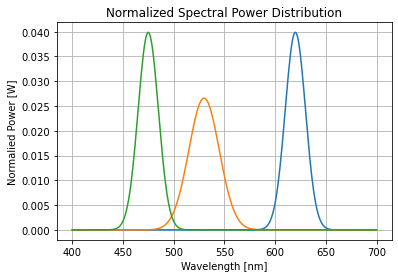

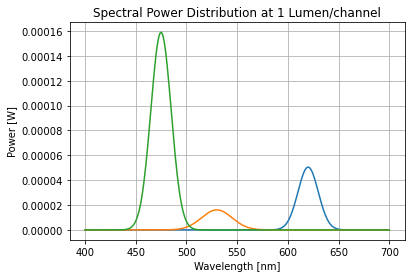

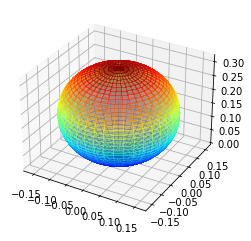


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [3.0000e+00 4.0000e+00 8.0000e+00] 
Normal Vector [x y z]: [0.0000e+00 0.0000e+00 -1.0000e+00] 
Lambert Number: 1.0 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 3.0000e+01 2.0000e+01]
Luminous Flux [lm]: 5000.0
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.8197e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [6.3336e+00 3.0328e+00 1.9934e+01] 
Total Power emmited by the Transmitter [W]: 
 29.300327676935847 



In [2]:
transmitter = Transmitter(
        "Led1",
        position=[3, 4, 8],
        normal=[0, 0, -1],
        mlambert=1,
        wavelengths=[620, 530, 475],
        fwhm=[20, 30, 20],
        modulation='ieee16',
        frequency=8000,
        no_symbols=100,
        luminous_flux=5000
    )
transmitter.plot_spd_normalized()
transmitter.plot_spd_at_1lm()
transmitter.plot_led_pattern()
print(transmitter)

The surface is defined from eight imputs parametes

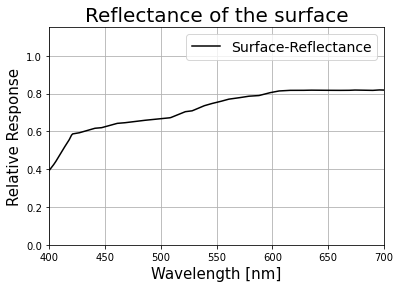

In [3]:
surface = Surface(
    name="surfacePlaster",
    position=[0, 0, 1],
    reflectance='plaster',
    vertex1=[1.0, 2.0, 0.0],
    vertex2=[5.0, 2.0, 0.0],
    vertex3=[5.0, 6.0, 4.0],
    vertex4=[1.0, 6.0, 4.0]
    )
surface.plot_reflectance()
surface._group_vertices()


The camera is defined from a set of 13 input parameters

Projecting surface onto the image plane...
Calibration matrix (K):
 [[3.0000e+00 0.0000e+00 3.0000e+00]
 [0.0000e+00 3.0000e+00 2.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e+00]]

Rotation matrix (R):
 [[1.0000e+00 -0.0000e+00 0.0000e+00]
 [-0.0000e+00 -0.0000e+00 1.0000e+00]
 [-0.0000e+00 -1.0000e+00 -0.0000e+00]]

Projection matrix (P):
 [[3.0000e+00 3.0000e+00 -0.0000e+00 -6.0000e+00]
 [-0.0000e+00 2.0000e+00 -3.0000e+00 5.0000e+00]
 [0.0000e+00 1.0000e+00 -0.0000e+00 1.0000e+00]]


/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_frame.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection="3d")
/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_principal_axis.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(proj

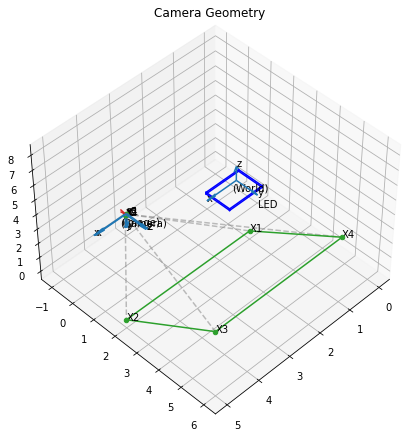

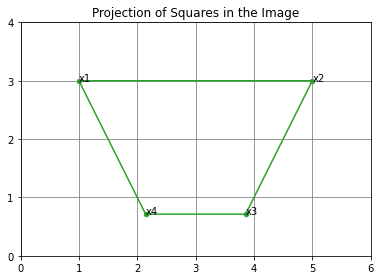

Computing the point's coordinates inside of the projected polygon ...


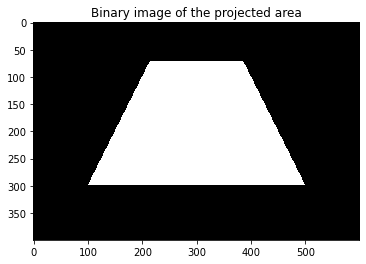

Computing the intersection points with the surface ... 
Computing the irradiance in each pixel ...


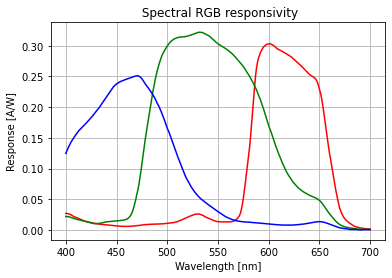

Computing crosstalk ... 
Crosstalk matrix:
 [[2.9182e-04 8.5387e-06 2.0425e-05]
 [9.7789e-05 1.3620e-04 3.1301e-04]
 [8.7657e-06 2.8187e-05 6.1458e-04]]


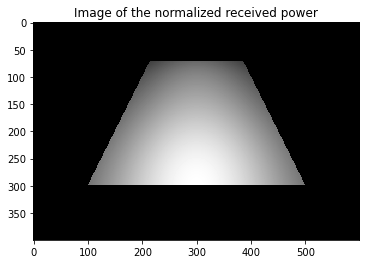

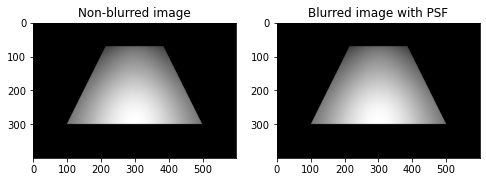

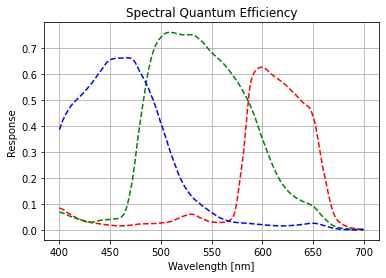

In [4]:
MX = 1.0e2  # number of pixels per unit distance in image coordinates in x direction
MY = 1.0e2  # number of pixels per unit distance in image coordinates in y direction
FOCAL_LENGTH = 3/MX  # focal length
PX= 3/MX  # principal point x-coordinate
PY= 2/MY  # principal point y-coordinate
THETA_X = np.pi / 2.0  # roll angle
THETA_Y = np.pi  # pitch angle
THETA_Z = np.pi  # yaw angle
C = np.array([3, -1, 1])  # camera centre
IMAGE_HEIGTH = 4
IMAGE_WIDTH = 6

camera = Camera(
    name="camera1",
    focal_length=FOCAL_LENGTH,
    px=PX,
    py=PY,
    mx=MX,
    my=MY,
    theta_x=THETA_X,
    theta_y=THETA_Y,
    theta_z=THETA_Z,
    centre=C,
    image_height=IMAGE_HEIGTH,
    image_width=IMAGE_WIDTH,    
    surface=surface,
    transmitter=transmitter,
    sensor='SonyStarvisBSI'
)
camera.plot_power_image()        
#camera.add_blur(size=7, center=3.5, sigma=0.1)
camera.plot_blurred_image()
camera.plot_quantum_efficiency()

The Rolling Shutter module is added.

Row bins:
[  0   5  11  18  25  31  38  45  51  58  64  71  78  84  91  97 104 111
 117 124 130 137 144 150 157 164 170 177 183 190 197 203 210 216 223 230
 236 243 250 256 263 269 276 283 289 296 302 309 316 322 329 335 342 349
 355 362 369 375 382 388 395 400]


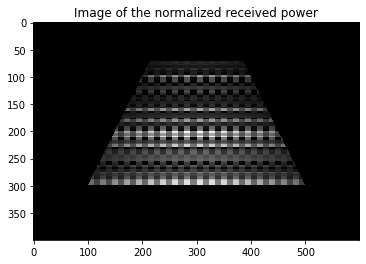

In [5]:
rollingshutter = RS(
    name="rs",
    t_exposure=85e-6,
    t_rowdelay=18.904e-6,
    t_start=0,
    iso=200,
    transmitter=transmitter,
    camera=camera
)

rollingshutter.plot_current_image()


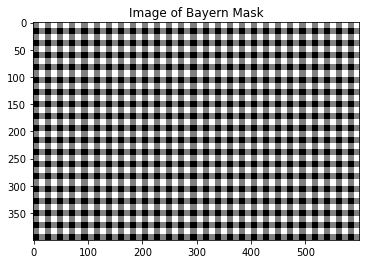

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000

In [8]:
# Library to plot 
import matplotlib.pyplot as plt

# print(transmitter._symbols_csk)
# Plot power image
plt.imshow(camera._image_bayern_mask, cmap='gray', interpolation='nearest')
plt.title("Image of Bayern Mask")        
plt.show()

print(rollingshutter._current_image[150:162, 300:312])